<a href="https://colab.research.google.com/github/robbieadam/TugasScrappingSerpAPI_0037/blob/main/ClustersnsScrapeTweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=9a738d9cf73356ecb099d5e367453ece2fbd89fbe4eea088480160c5c648f4e6
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [46]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

In [47]:
import pandas as pd
datatw=[]

In [55]:
keywords=['iPhone14']
start="2022–10–01"
end ="2022–10–10"
max_num=20
fname='tweet.json' 
languages=['de','en']

In [56]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}

            datatw.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

{"id": 1579668682980339712, "username": "KATE_LipMonster", "date": "2022-10-11 03:02:17+00:00", "text": "〇 Amazonで入荷中！\n〇 Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n〇 10/11 12:02:17\n#iPhone14 #iPhone14Plus #iPhone14Pro #iPhone14ProMax\nhttps://t.co/saBSOap2Eq", "url": "https://twitter.com/KATE_LipMonster/status/1579668682980339712"}
{"id": 1579668682946404352, "username": "KATE_LipMonster", "date": "2022-10-11 03:02:17+00:00", "text": "〇 Amazonで入荷中！\n〇 Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n〇 10/11 12:02:17\n#iPhone14 #iPhone14Plus #iPhone14Pro #iPhone14ProMax\nhttps://t.co/P2nP3AMXDJ", "url": "https://twitter.com/KATE_LipMonster/status/1579668682946404352"}
{"id": 1579668660628914176, "username": "News_iPhone14", "date": "2022-10-11 03:02:12+00:00", "text": "Amazonにて入荷中！\nApple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n#iPhone14 #iPhone14Plus\n#iPhone14Pro #iPhone14ProMax\n10/11 12:02:11 現在\nhttps://t.co/oEZOsTDHbz", "url": "https://twitter.com/News_iPhone14/status/1579668660628914

In [57]:
>>> import nltk
>>> nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
datatw

['@notromeosgirl iphone 14 fytb',
 '〇 Amazonで入荷中！\n〇 Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n〇 10/11 12:02:17\n#iPhone14 #iPhone14Plus #iPhone14Pro #iPhone14ProMax\nhttps://t.co/saBSOap2Eq',
 '〇 Amazonで入荷中！\n〇 Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n〇 10/11 12:02:17\n#iPhone14 #iPhone14Plus #iPhone14Pro #iPhone14ProMax\nhttps://t.co/P2nP3AMXDJ',
 'Amazonにて入荷中！\nApple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n#iPhone14 #iPhone14Plus\n#iPhone14Pro #iPhone14ProMax\n10/11 12:02:11 現在\nhttps://t.co/oEZOsTDHbz',
 '■ Amazonにて入荷中 🍎\n■ Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n■ 入荷日時 10/11 12:02:11\n#iPhone14 #iPhone14Pro #iPhone14ProMax\nhttps://t.co/20wnIi87kT',
 '〇 Amazonで入荷中！\n〇 Apple iPhone 14 256GB ミッドナイト - SIMフリー 5G対応\n〇 10/11 12:02:11\n#iPhone14 #iPhone14Plus #iPhone14Pro #iPhone14ProMax\nhttps://t.co/m5lEXMZ7Ob',
 'Apple releases iOS 16.0.3 with iPhone 14, Mailjack fixes ahead of iOS\xa016.1 https://t.co/ZreTN5FAYs']

In [60]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatw:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [61]:
documents_clean[0:5]

['notromeosgirl iphone fytb',
 'amazon apple iphone gb sim g iphone iphoneplus iphonepro iphonepromax https t co sabsoapeq',
 'amazon apple iphone gb sim g iphone iphoneplus iphonepro iphonepromax https t co pnpamxdj',
 'amazon apple iphone gb sim g iphone iphoneplus iphonepro iphonepromax https t co oezostdhbz',
 'amazon apple iphone gb sim g iphone iphonepro iphonepromax https t co wniikt']

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

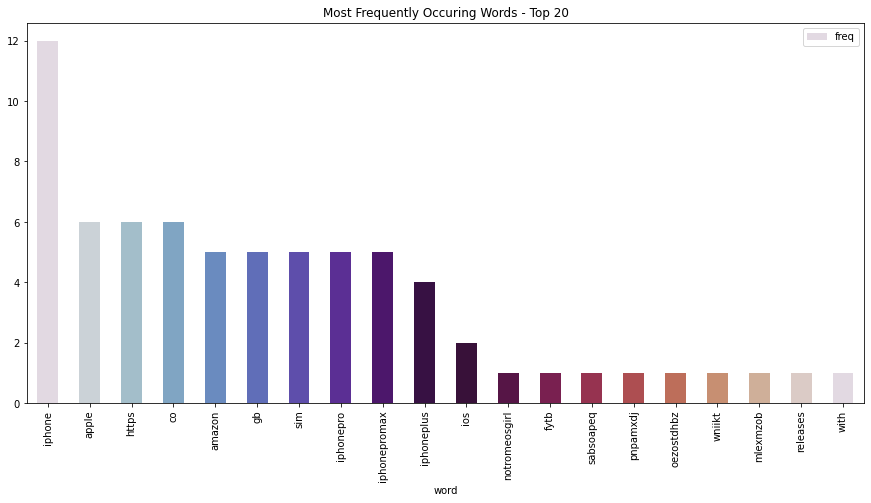

In [63]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [64]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [65]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 iphone
 iphonepromax
 co
 iphonepro
 https
 gb
 apple
 sim
 amazon
 iphoneplus
Cluster 1:
 ios
 zretnfays
 mailjack
 apple
 co
 fixes
 https
 iphone
 ahead
 of
Cluster 2:
 fytb
 notromeosgirl
 iphone
 zretnfays
 iphonepro
 amazon
 apple
 co
 fixes
 gb




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


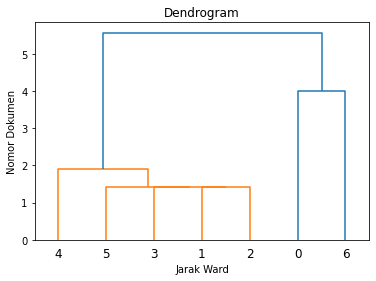

In [66]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

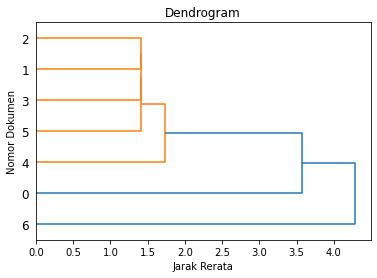

In [67]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()